# Conjunto de datos de predicción de lesiones

Para hacer frente a la creciente preocupación por la seguridad de los jugadores y la prevención de lesiones en los deportes de competición, presentamos un conjunto de datos sintéticos diseñados específicamente para la predicción de lesiones. Aprovechando bibliotecas de Python como NumPy y Pandas, pretendemos crear una representación realista de los datos de salud y lesiones de los jugadores. Nuestro conjunto de datos sintéticos captura atributos críticos como la demografía de los jugadores, las intensidades de entrenamiento, los tiempos de recuperación y los historiales de lesiones previas. Establecemos correlaciones entre estas características y la probabilidad de futuras lesiones para simular con precisión escenarios del mundo real.



# Cargar librerias







In [50]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'1.5.3'

# Leer el dataset

In [223]:
# a =  pd.read_csv("data/california_housing_train.csv")
from google.colab import drive
drive.mount('/content/drive')
i =  pd.read_csv("/content/drive/MyDrive/UIS/2024-1/IA/PROYECTO IA/injury_data.csv", sep=",")

type(i)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pandas.core.frame.DataFrame

# **SHAPE**

In [222]:
print(f"Filas: {i.shape[0]}")
print(f"Columnas:  {i.shape[1]}")


Filas: 1000
Columnas:  7


#**VARIABLES**


*   **Player_Age**	-> Edad del jugador

*   **Player_Height**	-> Altura del jugador

*   **Previous_Injuries**	-> Lesiones previas

*   **Training_Intensity**	-> Intensidad de entrenamiento

*   **Player_Weight**	-> Peso del jugador

*   **Recovery_Time**	-> Tiempo de recuperación

*   **Likelihood_of_Injury** -> Probabilidad de lesión

















# **COLUMNAS CON EL MÉTODO COLUMNS**

In [52]:
print("COLUMNAS\n")
for column in i.columns:
    print(column)

COLUMNAS

Player_Age
Player_Weight
Player_Height
Previous_Injuries
Training_Intensity
Recovery_Time
Likelihood_of_Injury


# **DESCRIPCIÓN DE LAS VARIABLES DEL DATASET CON EL MÉTODO DESCRIBE()**

In [174]:
i.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


#  **INFORMACIÓN DEL DATASET CON INFO()**

In [221]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


# **VISUALIZACIÓN DEL DATASET**

In [224]:
print("-------------------------------------------------------------------- \n Display data \n --------------------------------------------------------------------")
i.head(17)

-------------------------------------------------------------------- 
 Display data 
 --------------------------------------------------------------------


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


# **GRÁFICAS**

# **CORRELACIÓN**

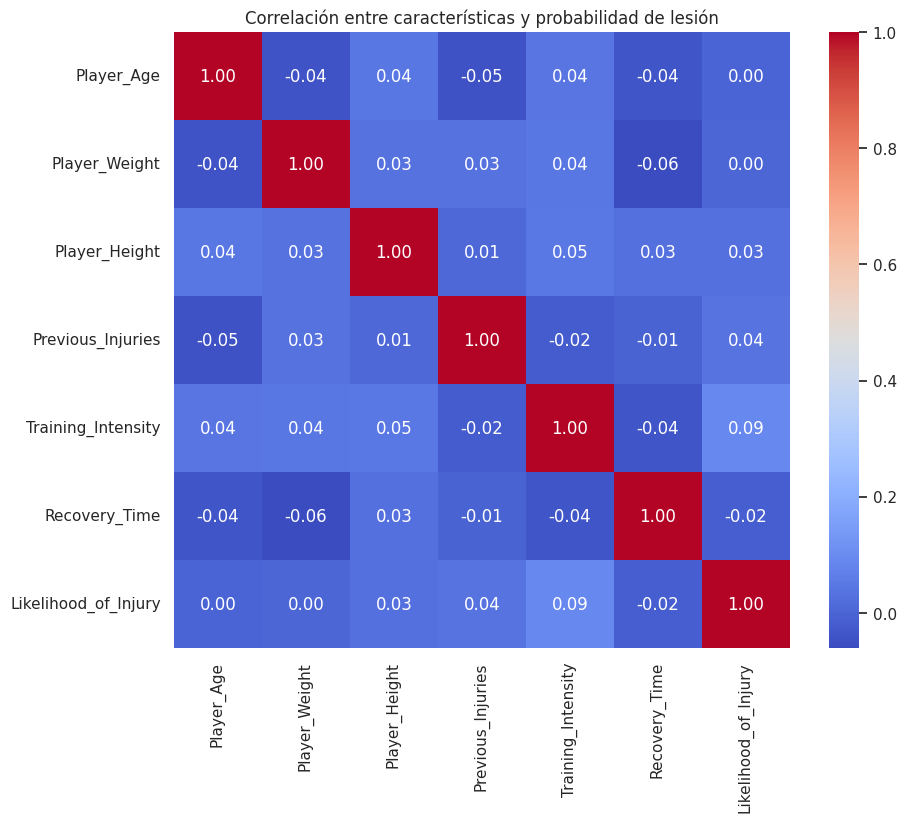

In [225]:
# Calcular la matriz de correlación
correlation_matrix = i.corr()

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlación entre características y probabilidad de lesión')
plt.show()

# **EDAD**

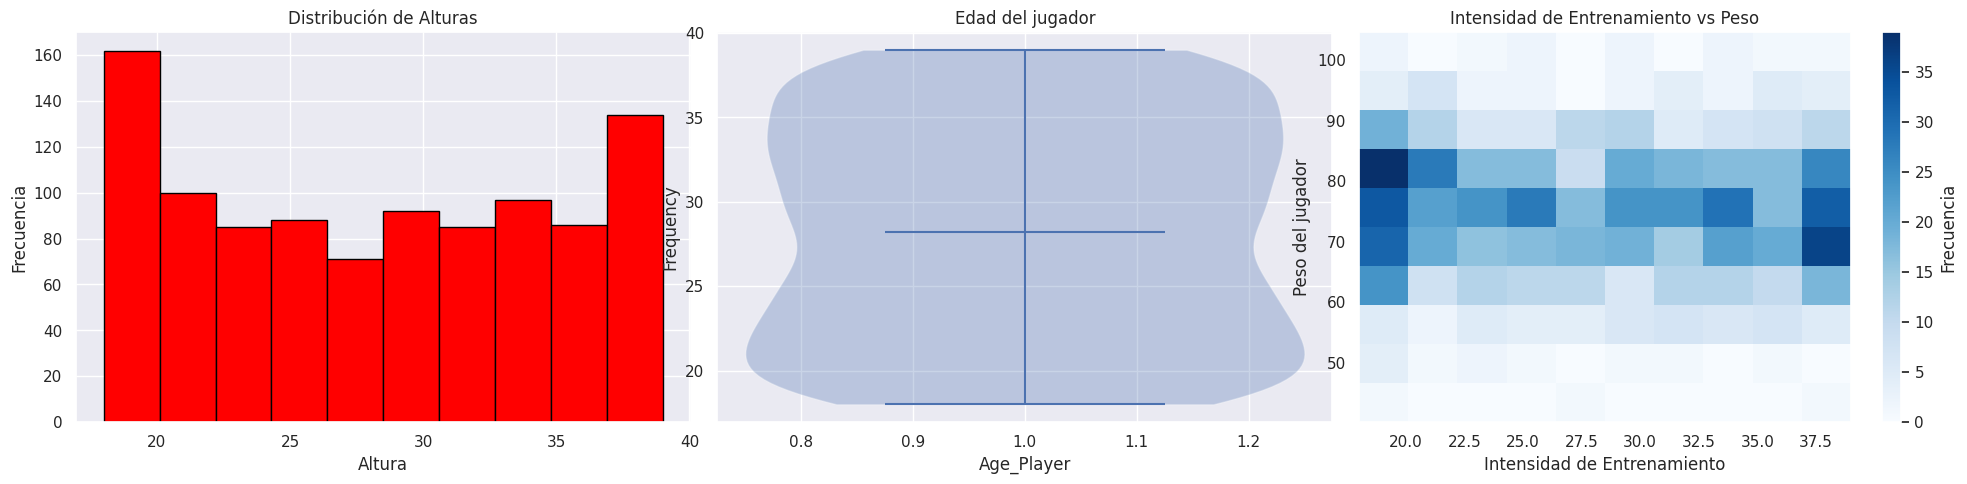

In [248]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist(i['Player_Age'], bins=10, color='red', edgecolor='black')
plt.title('Distribución de Alturas')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 3, 2)
# Create the violin plot
plt.violinplot(i["Player_Age"], showmeans=True, showextrema=True)
plt.xlabel("Age_Player")
plt.ylabel("Frequency")
plt.title("Edad del jugador")

plt.subplot(1, 3, 3)
plt.hist2d(i['Player_Age'], i['Player_Weight'], bins=(10, 10), cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Intensidad de Entrenamiento vs Peso')
plt.xlabel('Intensidad de Entrenamiento')
plt.ylabel('Peso del jugador')
plt.grid(True)
plt.show()

# **ALTURA DEL JUGADOR**

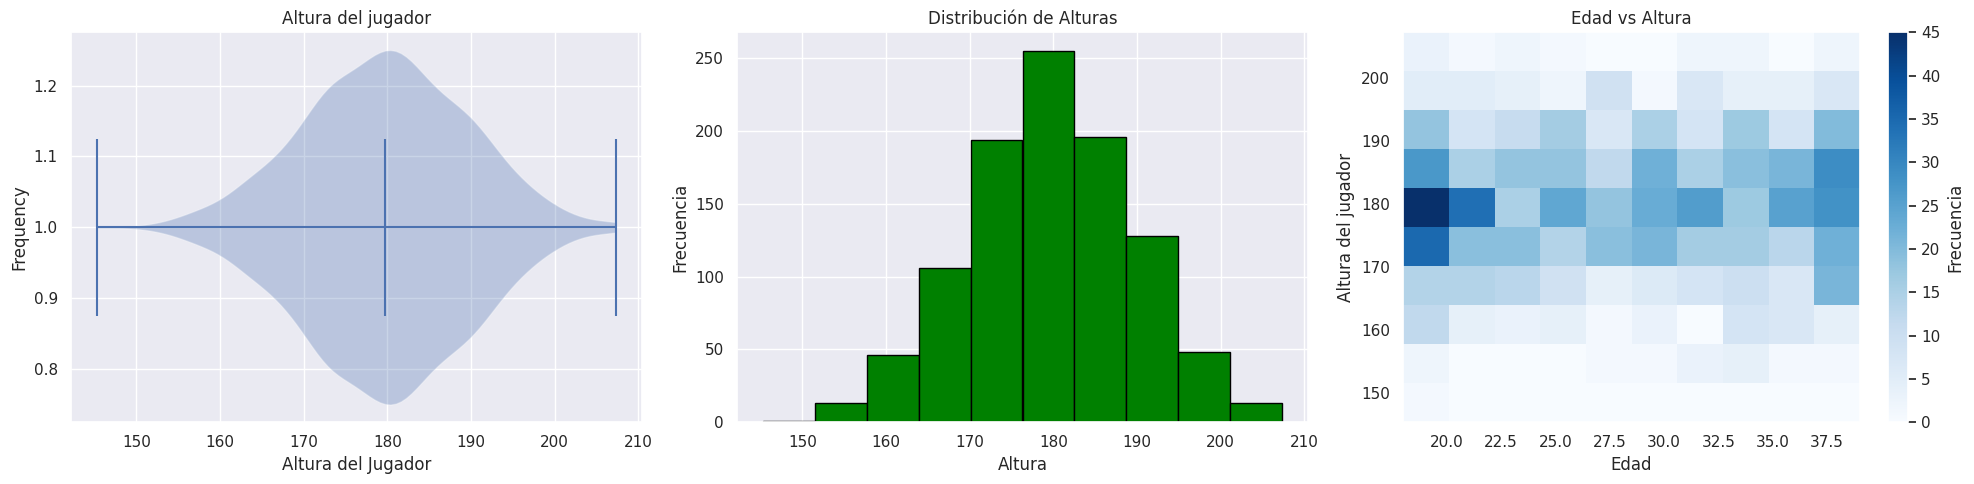

In [236]:
plt.figure(figsize=(20, 5))


plt.subplot(1, 3, 1)
plt.violinplot(i["Player_Height"], showmeans=True, showextrema=True, vert = False )
plt.xlabel("Altura del Jugador")
plt.ylabel("Frequency")
plt.title("Altura del jugador")

plt.subplot(1, 3, 2)
plt.hist(i['Player_Height'], bins=10, color='green', edgecolor='black')
plt.title('Distribución de Alturas')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.hist2d(i['Player_Age'], i['Player_Height'], bins=(10, 10), cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Edad vs Altura')
plt.xlabel('Edad')
plt.ylabel('Altura del jugador')
plt.grid(True)
plt.show()

# **LESIONES PREVIAS**

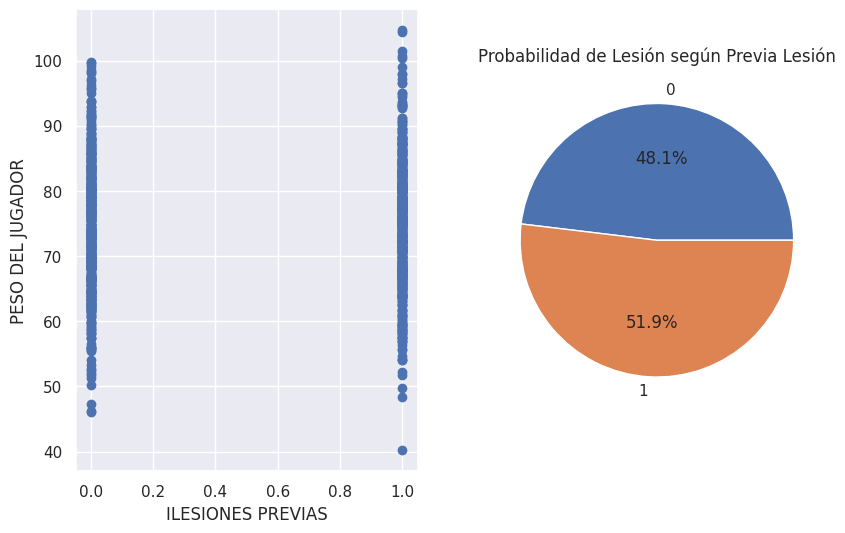

In [228]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)

plt.scatter(x="Previous_Injuries", y="Player_Weight", data=i)

plt.xlabel("ILESIONES PREVIAS")
plt.ylabel("PESO DEL JUGADOR")

plt.subplot(1, 3, 2)
# Calculate percentages for the pie chart
percentages = i['Likelihood_of_Injury'] / i['Likelihood_of_Injury'].sum() * 100  # Calculate percentages

# Agrupar por "Previous_Injuries" y calcular la probabilidad de lesión promedio
df_grouped = i.groupby("Previous_Injuries")["Likelihood_of_Injury"].mean()


# Crear el diagrama de torta
plt.pie(df_grouped, labels=df_grouped.index, autopct="%1.1f%%")

# Agregar título
plt.title("Probabilidad de Lesión según Previa Lesión")

# Mostrar el diagrama de torta
plt.show()

# **INTENSIDAD DE ENTRENAMIENTO**

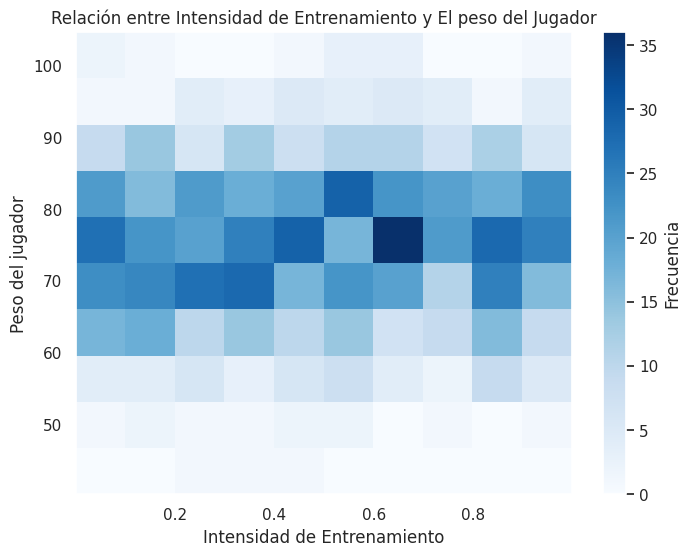

In [229]:
plt.figure(figsize=(8, 6))
plt.hist2d(i['Training_Intensity'], i['Player_Weight'], bins=(10, 10), cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Relación entre Intensidad de Entrenamiento y El peso del Jugador')
plt.xlabel('Intensidad de Entrenamiento')
plt.ylabel('Peso del jugador')
plt.grid(True)
plt.show()


# **PESO DEL JUGADOR**

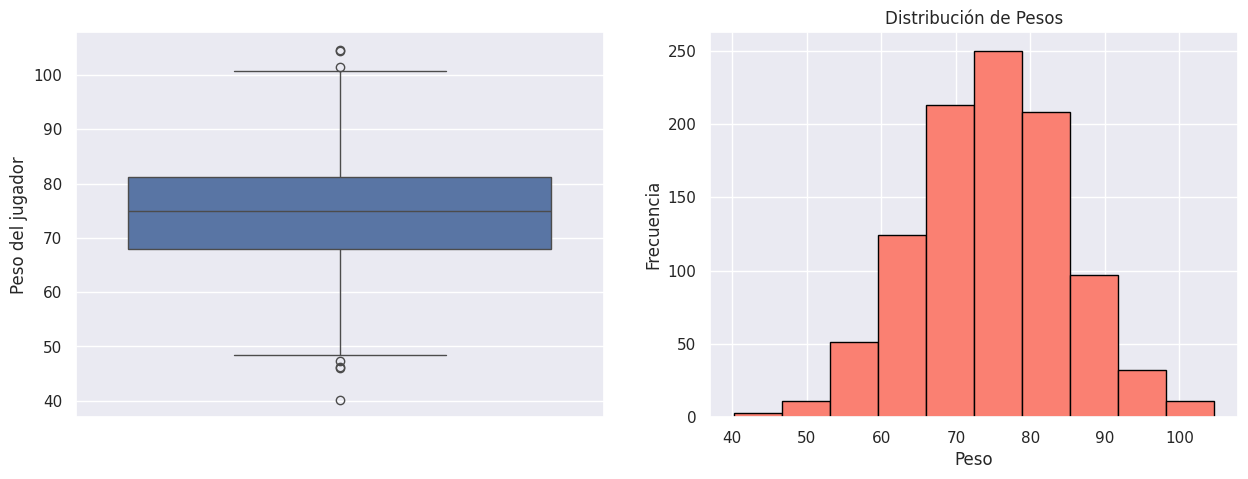

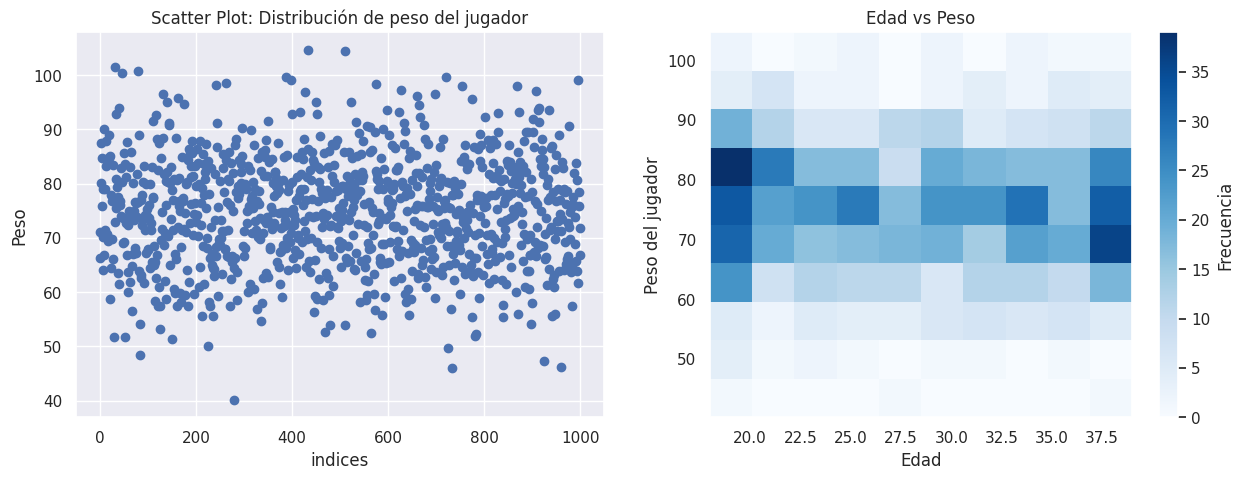

In [230]:
plt.figure(figsize = (15, 5))
ax=plt.subplot(1,2,1)
sns.boxplot(data=i, y='Player_Weight', ax= ax).set_ylabel('Peso del jugador');

plt.subplot(1,2,2)
plt.hist(i['Player_Weight'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de Pesos')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(i.index, i["Player_Weight"])
plt.xlabel("indices")
plt.ylabel("Peso")
plt.title("Scatter Plot: Distribución de peso del jugador")
plt.grid(True)

plt.subplot(1,2,2)
plt.hist2d(i['Player_Age'], i['Player_Weight'], bins=(10, 10), cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Edad vs Peso')
plt.xlabel('Edad')
plt.ylabel('Peso del jugador')
plt.grid(True)
plt.show()

# **TIEMPO DE RECUPERACIÓN**

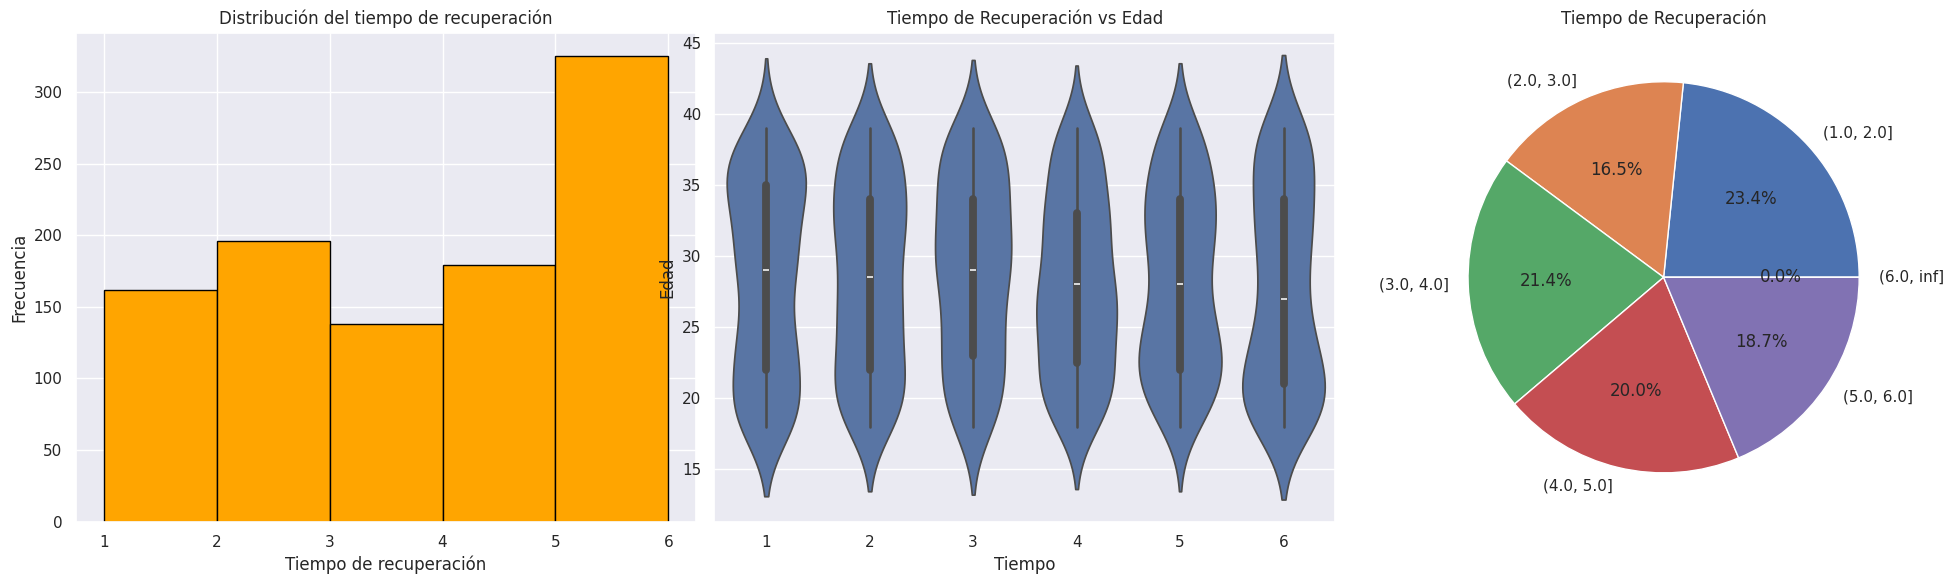

In [220]:
# Diagrama de violín
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(df['Recovery_Time'], bins=5, color='orange', edgecolor='black')
plt.title('Distribución del tiempo de recuperación')
plt.xlabel('Tiempo de recuperación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 3, 2)
sns.violinplot(x="Recovery_Time", y="Player_Age", data=i)
plt.title("Tiempo de Recuperación vs Edad")
plt.xlabel("Tiempo")
plt.ylabel("Edad")


plt.subplot(1, 3,3)
# Crear el diagrama de torta
df_grouped = i.groupby(pd.cut(i["Recovery_Time"], [1, 2, 3,4, 5, 6, np.inf])).size()
plt.pie(df_grouped, labels=df_grouped.index, autopct="%1.1f%%")
plt.title("Tiempo de Recuperación")


plt.show()

# **PROBABILIDAD DE LESIÓN**

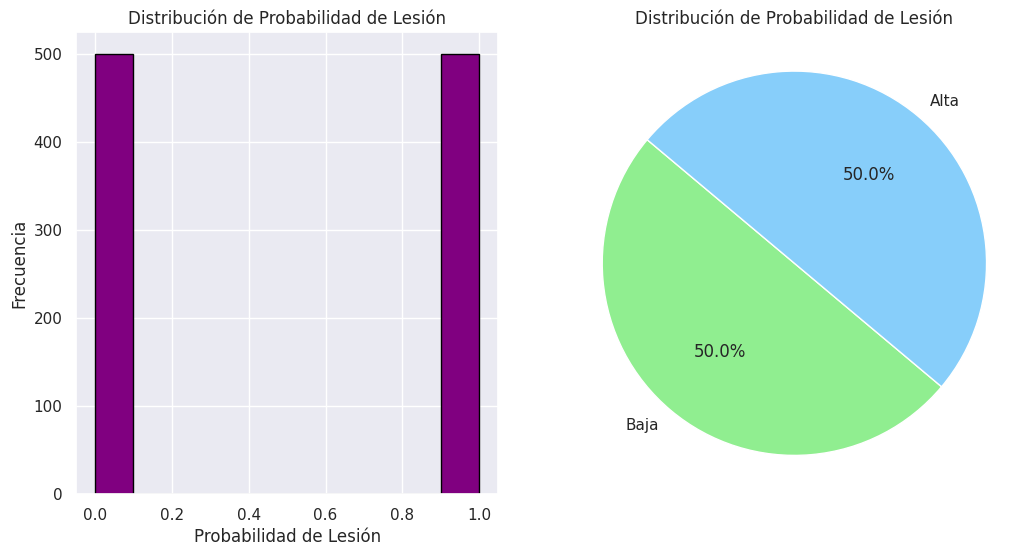

In [149]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Likelihood_of_Injury'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución de Probabilidad de Lesión')
plt.xlabel('Probabilidad de Lesión')
plt.ylabel('Frecuencia')
plt.grid(True)

#DIAGRAMA DE TORTA
plt.subplot(1, 2, 2)
labels = ['Baja', 'Alta']
sizes = i['Likelihood_of_Injury'].value_counts(normalize=True).sort_index()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightskyblue'])
plt.title('Distribución de Probabilidad de Lesión')
plt.axis('equal')
plt.show()

# **SCATTER Y JOINTPLOT**

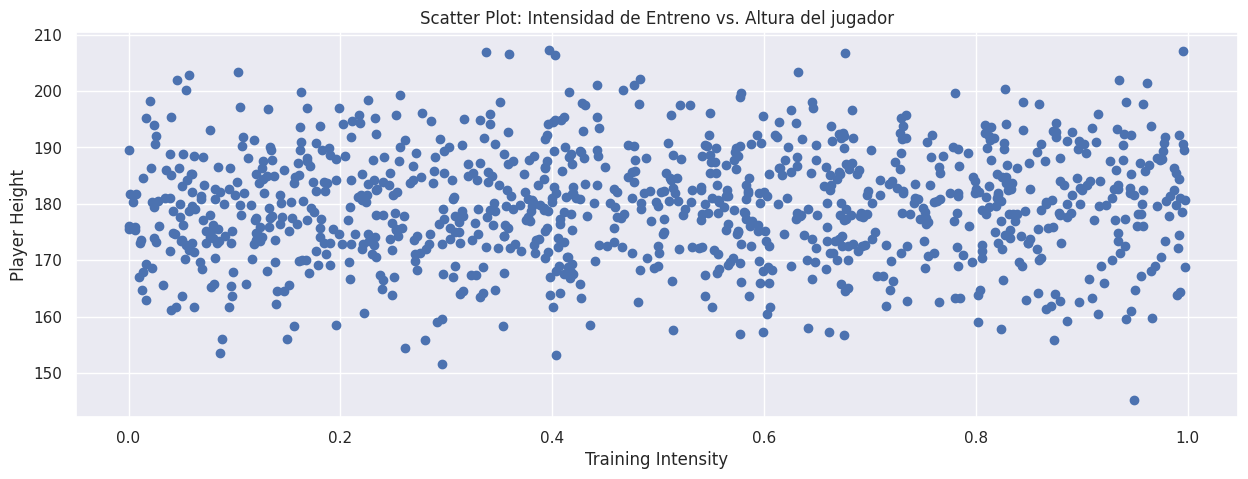

In [135]:
plt.figure(figsize=(15, 5))

plt.scatter(i["Training_Intensity"], i["Player_Height"])
plt.xlabel("Training Intensity")
plt.ylabel("Player Height")
plt.title("Scatter Plot: Intensidad de Entreno vs. Altura del jugador")
plt.grid(True)

plt.show()

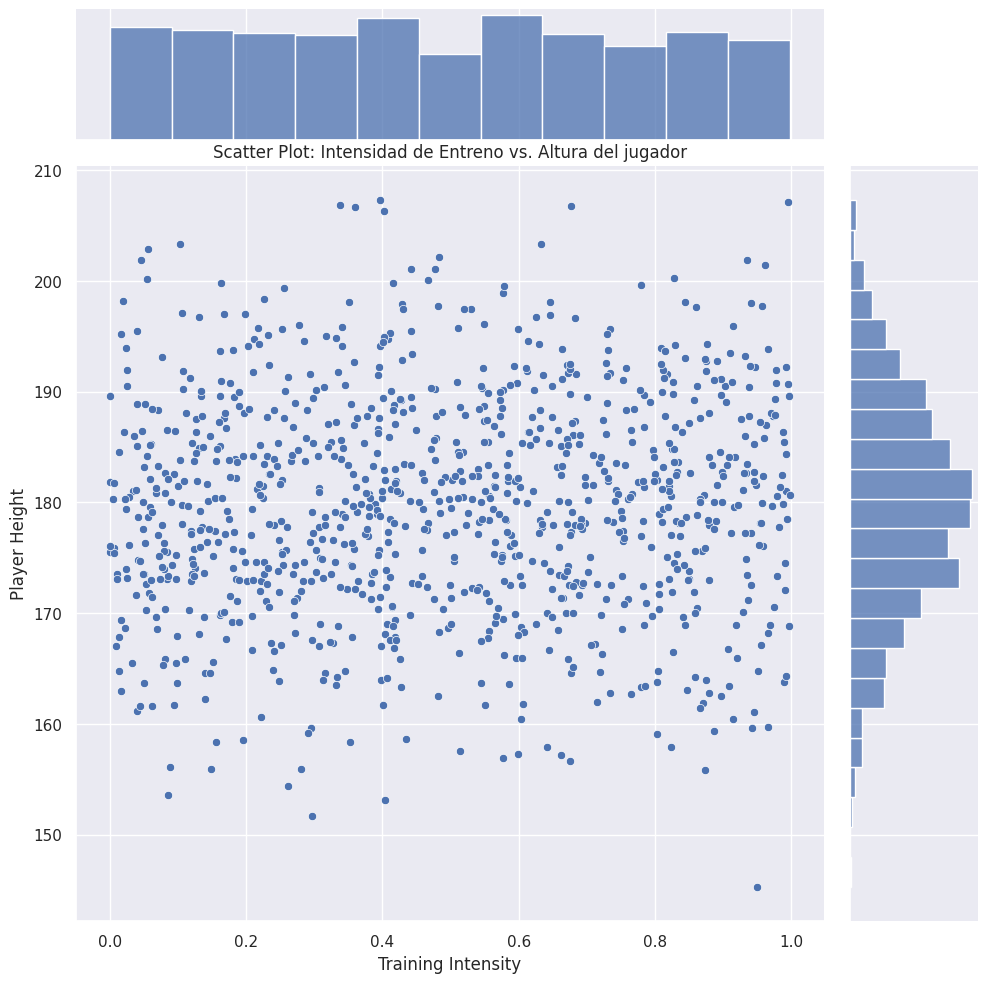

In [139]:
# Jointplot
sns.jointplot(x="Training_Intensity", y="Player_Height", data=i, height = 10)
plt.xlabel("Training Intensity")
plt.ylabel("Player Height")
plt.title("Scatter Plot: Intensidad de Entreno vs. Altura del jugador")

plt.show()
